# Préparation des Données pour le Machine Learning (Location)

Ce notebook a pour objectif de fusionner les données extraites de **Avito** et **Mubawab**, de nettoyer les incohérences et de préparer un dataset final prêt à être utilisé par des algorithmes de Machine Learning.

**Étapes clés :**
1. Fusion des sources.
2. Suppression des doublons inter-plateformes.
3. Détection des valeurs aberrantes (Outliers) via le prix au m².
4. Normalisation des noms de villes.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Importation et Fusion des Sources
Nous regroupons les deux fichiers CSV nettoyés en ajoutant une colonne `source` pour conserver la traçabilité de l'annonce.

In [37]:
# Charger les fichiers
df_avito = pd.read_csv('../data/clean_data/avito_location_clean.csv')
df_mubawab = pd.read_csv('../data/clean_data/mubawab_location_all_clean.csv')

# Ajouter la source
df_avito['source'] = 'avito'
df_mubawab['source'] = 'mubawab'

# Fusionner les deux DataFrames
df = pd.concat([df_avito, df_mubawab], ignore_index=True)

print(f"Nombre de lignes avant suppression des doublons : {len(df)}")

Nombre de lignes avant suppression des doublons : 16603


## 2. Gestion des Doublons
Une même annonce peut être présente sur les deux sites. Nous identifions les doublons en nous basant sur la combinaison unique : `ville`, `prix`, `surface` et `nb_chambres`.

In [38]:
# On garde la première occurrence et on supprime les autres
df_cleaned = df.drop_duplicates(subset=['ville' , 'prix' , 'surface' , 'quartier' ,'type_bien' , 'nb_chambres' , 'nb_salle_de_bain'], keep='first').copy()

print(f"Nombre de lignes après suppression des doublons : {len(df_cleaned)}")
print(f"Nombre de lignes supprimées : {len(df) - len(df_cleaned)}")

Nombre de lignes après suppression des doublons : 14547
Nombre de lignes supprimées : 2056


## 3. Analyse du Prix au m² et Traitement des Outliers
Le prix au m² est un indicateur de fiabilité. Des valeurs trop élevées (ex: > 400 DH/m²) ou trop basses (ex: < 10 DH/m²) indiquent généralement des erreurs de saisie ou des prix de vente confondus avec des loyers.

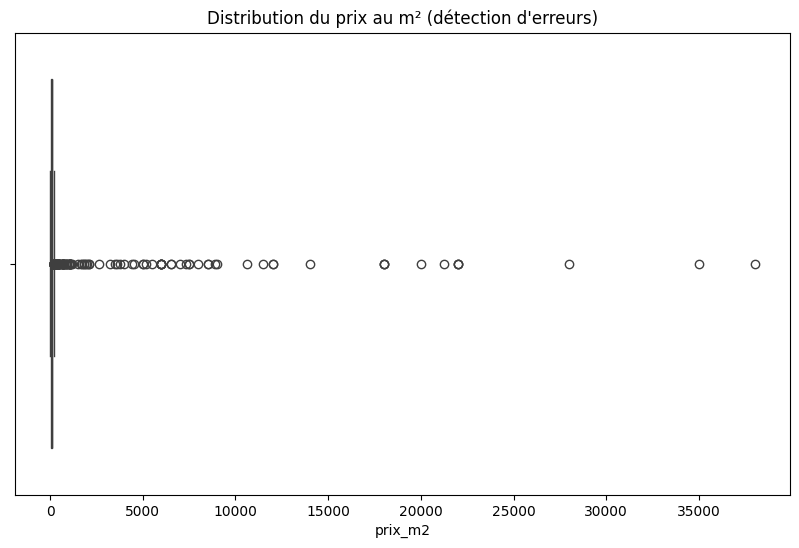

Lignes restantes après filtrage des prix aberrants : 13993


In [39]:
# Calcul du prix au m2
df_cleaned['prix_m2'] = df_cleaned['prix'] / df_cleaned['surface']

# Visualisation pour voir les erreurs (Outliers)
plt.figure(figsize=(10,6))
sns.boxplot(x=df_cleaned['prix_m2'])
plt.title("Distribution du prix au m² (détection d'erreurs)")
plt.show()

# Exemple de filtrage : On garde les loyers entre 20 DH/m² et 300 DH/m² 
# (À ajuster selon tes observations sur le marché marocain)
df_final = df_cleaned[(df_cleaned['prix_m2'] > 10) & (df_cleaned['prix_m2'] < 3000)].copy()

df_final.head()

print(f"Lignes restantes après filtrage des prix aberrants : {len(df_final)}")

## 4. Normalisation des Variables Catégorielles
Nous uniformisons les noms des villes pour éviter les doublons linguistiques (Arabe/Français) et assurer la cohérence du modèle.

In [40]:
print("Types de biens :", df_final['type_bien'].unique())

mapping_villes = {
    'الدار البيضاء': 'Casablanca',
    'طنجة': 'Tanger',
    'الرباط': 'Rabat',
    'مراكش': 'Marrakech'
}
print("Villes avant normalisation :", df_final['ville'].unique())
# Remplacement des valeurs
df_final['ville'] = df_final['ville'].replace(mapping_villes)

# Vérification
print("Villes après normalisation :", df_final['ville'].unique())

Types de biens : ['Appartement' 'Villa' 'Maison' 'Riad']
Villes avant normalisation : ['Casablanca' 'Tanger' 'Marrakech' 'Rabat' 'الدار البيضاء' 'الرباط' 'طنجة'
 'مراكش']
Villes après normalisation : ['Casablanca' 'Tanger' 'Marrakech' 'Rabat']


## 5. Sauvegarde du Dataset Final
Le dataset est maintenant propre. Nous exportons le fichier `location_ready_for_ml.csv` qui sera utilisé pour l'entraînement.

In [41]:
# # On supprime les colonnes inutiles pour l'entraînement (ID, URL, prix_m2)
df_ml = df_final.drop(['id', 'url_annonce', 'prix_m2'], axis=1).copy()

# Sauvegarde pour le notebook de Machine Learning
df_ml.to_csv('../data/clean_data/location_ready_for_ml.csv', index=False)
print("Fichier sauvegardé : location_ready_for_ml.csv")
print(f"Lignes finale : {len(df_ml)} \n")

Fichier sauvegardé : location_ready_for_ml.csv
Lignes finale : 13993 

